In [ ]:
"""
Data Analytics II

1. Implement logistic regression using Python/R to perform classification on
Social_Network_Ads.csv dataset.

2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall
on the given dataset.
"""

In [10]:
# Importing the dependencies

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing dataset from local file

df = pd.read_csv("Social_Network_Ads.csv")


In [3]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df.isnull().sum()

# no null values;

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
df.shape

(400, 5)

In [9]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [12]:
X = df.iloc[:, [2, 3]].values
# X = df[['EstimatedSalary','Age']]
y = df.iloc[:, 4].values
# y = df['Purchased']

## Test-size = 0.2

In [63]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [64]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [65]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [66]:
y_pred = lr.predict(X_test)

In [67]:
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0])

In [68]:
y_test

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1])

In [69]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# TP FP
# FN TN

[[50  2]
 [ 9 19]]


<AxesSubplot: >

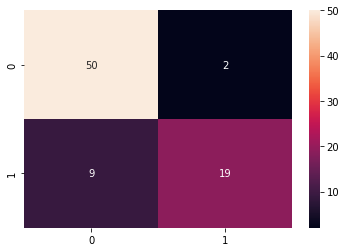

In [70]:
sns.heatmap(cm ,annot=True)

In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        52
           1       0.90      0.68      0.78        28

    accuracy                           0.86        80
   macro avg       0.88      0.82      0.84        80
weighted avg       0.87      0.86      0.86        80



In [72]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8625

In [73]:
error_rate = 1-accuracy
error_rate

0.13749999999999996

## Test-size = 0.25

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=25)

In [40]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [41]:
lr = LogisticRegression(random_state=25)
lr.fit(X_train, y_train)

LogisticRegression(random_state=25)

In [42]:
y_pred = lr.predict(X_test)

In [43]:
cm = confusion_matrix(y_test, y_pred)

In [44]:
print(cm)

# TP FP
# FN TN

[[58  8]
 [13 21]]


In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        66
           1       0.72      0.62      0.67        34

    accuracy                           0.79       100
   macro avg       0.77      0.75      0.76       100
weighted avg       0.79      0.79      0.79       100



In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

## Test-size = 0.3

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=25)

In [53]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [54]:
lr = LogisticRegression(random_state=30)
lr.fit(X_train, y_train)

LogisticRegression(random_state=30)

In [55]:
y_pred = lr.predict(X_test)

In [56]:
cm = confusion_matrix(y_test, y_pred)

In [57]:
print(cm)

# TP FP
# FN TN

[[70  7]
 [16 27]]


In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86        77
           1       0.79      0.63      0.70        43

    accuracy                           0.81       120
   macro avg       0.80      0.77      0.78       120
weighted avg       0.81      0.81      0.80       120



In [59]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8083333333333333

In [61]:
error_rate = 1-accuracy
error_rate

0.19166666666666665